In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df2=df.copy() #copying the dataset incase of any troubles affecting the original dataset too

In [6]:
#Converting into binary indexes
df2.loc[df2["Category"] == "spam","Category"]=0
df2.loc[df2["Category"] == "ham","Category"]=1

In [7]:
df2.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
x=df2["Message"]
y=df2["Category"]

In [9]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [10]:
#training and testing
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [11]:
#extracting features from the messages and labels
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [12]:
#initializing the logistic regression model
model=LogisticRegression()

In [13]:
#trains the model with x and y
model.fit(X_train_features,Y_train)

LogisticRegression()

In [14]:
#prediction on training data
pred_on_training=model.predict(X_train_features)
acc_on_training=accuracy_score(Y_train,pred_on_training)

In [15]:
#prediction on testing data
pred_on_testing=model.predict(X_test_features)
acc_on_testing=accuracy_score(Y_test,pred_on_testing)

In [16]:
print("Accuracy on training data:",acc_on_training)
print("Accuracy on testing data:",acc_on_testing)

Accuracy on training data: 0.9676912721561588
Accuracy on testing data: 0.9668161434977578


In [17]:
#prediction system for any mails
input_mail=["""Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""]

input_mail_features=feature_extraction.transform(input_mail)
prediction=model.predict(input_mail_features)

if prediction == 0:
    print("This is a Spam mail")
else:
    print("This is a valid mail")

This is a Spam mail


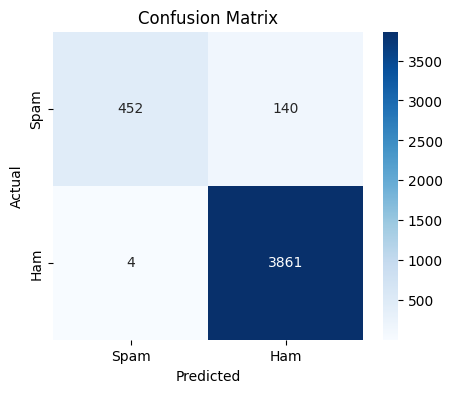

In [18]:
# Get predictions on test or train data
y_pred = model.predict(X_train_features)

# Compute confusion matrix
cm = confusion_matrix(Y_train, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()